In [25]:
# get folder names
import os
path = '/Users/uditdhand/Documents/Fall/Advanced ML/Data/genres_original/'
folders = os.listdir(path)
folders.remove('.DS_Store')

# Placeholder for your dataset
songs = []  # List of paths to song files
genres = []  # Corresponding list of genre labels for the songs

# populate songs and genres, the main folder is /Users/uditdhand/Documents/Fall/Advanced ML/Data/genres_original/, which contains 10 folders, each folder contains 100 songs
for folder in folders:
    for filename in os.listdir(path + folder):
        songs.append(path + folder + '/' + filename)
        genres.append(folder)

In [26]:
import whisper
model = whisper.load_model("base")  # or another model variant

In [27]:
path = "/Users/uditdhand/Documents/Fall/Advanced ML/Data/genres_original/pop/pop.00027.wav"
result = model.transcribe("/Users/uditdhand/Documents/Fall/Advanced ML/Data/genres_original/pop/pop.00027.wav")
print(result["text"])

/Users/uditdhand/anaconda3/lib/python3.10/site-packages/whisper/transcribe.py:115: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 You're not a picture in my hand Trying my best to understand I really wanna know what we did home This love that felt so strong If only you were here tonight I know that we could make it right I told my father and I forgot your love I was born to thank you happy Everything will be fine


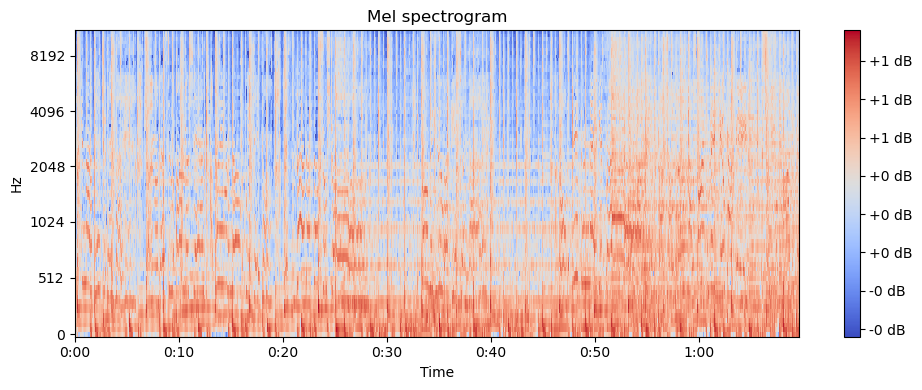

tensor([[ 0.8566,  0.3906,  0.4433,  ...,  1.2061,  1.2288,  1.2172],
        [ 0.6725,  0.8177,  0.5046,  ...,  1.1408,  1.2289,  1.1824],
        [ 0.8454,  0.9354,  0.8367,  ...,  1.0094,  1.1074,  1.0894],
        ...,
        [-0.3488, -0.3711, -0.3108,  ...,  0.2839,  0.2560,  0.2234],
        [-0.3108, -0.3709, -0.3929,  ...,  0.2547,  0.1877,  0.1542],
        [-0.3586, -0.4308, -0.4273,  ...,  0.1476,  0.1374,  0.1159]])

In [28]:
path = "/Users/uditdhand/Documents/Fall/Advanced ML/Data/genres_original/pop/pop.00027.wav"
audio = whisper.load_audio(path)
mel = whisper.log_mel_spectrogram(audio).to(model.device)
mel

# plot mel spectrogram 'mel

import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(10, 4))
librosa.display.specshow(mel.cpu().numpy(), sr=22050, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()

mel


In [30]:
# loop over all songs and get the mel spectrogram and transcription for each song, store them in a list

import numpy as np
import whisper
import torch
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"  # Use GPU if available
model.to(device)

path = '/Users/uditdhand/Documents/Fall/Advanced ML/Data/genres_original/'
folders = os.listdir(path)
folders.remove('.DS_Store')

# Placeholder for your dataset
songs = []  # List of paths to song files
genres = []  # Corresponding list of genre labels for the songs

# populate songs and genres, the main folder is /Users/uditdhand/Documents/Fall/Advanced ML/Data/genres_original/, which contains 10 folders, each folder contains 100 songs
for folder in folders:
    for filename in os.listdir(path + folder):
        songs.append(path + folder + '/' + filename)
        genres.append(folder)


songs.remove('/Users/uditdhand/Documents/Fall/Advanced ML/Data/genres_original/jazz/.DS_Store')

# create a dataframe to store the mel spectrogram and transcription for each song
df = pd.DataFrame(columns=['song', 'genre', 'mel', 'transcription'])

# loop over all songs and get the mel spectrogram and transcription for each song, store them in a list
for i in tqdm.tqdm(range(len(songs))): #len(songs)
    audio = whisper.load_audio(songs[i])
    mel = whisper.log_mel_spectrogram(audio).to(model.device)
    result = model.transcribe(songs[i])
    transcription = result["text"]
    df = pd.concat([df, pd.DataFrame({'song': [songs[i]], 'genre': [genres[i]], 'mel': [mel], 'transcription': [transcription]})], ignore_index=True)

df

  0%|          | 0/999 [00:00<?, ?it/s]/Users/uditdhand/anaconda3/lib/python3.10/site-packages/whisper/transcribe.py:115: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
  0%|          | 1/999 [00:08<2:21:18,  8.50s/it]/Users/uditdhand/anaconda3/lib/python3.10/site-packages/whisper/transcribe.py:115: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
  0%|          | 2/999 [00:11<1:27:02,  5.24s/it]/Users/uditdhand/anaconda3/lib/python3.10/site-packages/whisper/transcribe.py:115: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
  0%|          | 3/999 [00:14<1:13:07,  4.41s/it]/Users/uditdhand/anaconda3/lib/python3.10/site-packages/whisper/transcribe.py:115: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not s

,song,genre,mel,transcription
0,/Users/uditdhand/Documents/Fall/Advanced ML/Da...,pop,"[[tensor(0.8566), tensor(0.3906), tensor(0.443...",You're not a picture in my hand Trying my bes...
1,/Users/uditdhand/Documents/Fall/Advanced ML/Da...,pop,"[[tensor(0.7408), tensor(0.7610), tensor(0.555...",I'm a bit... I'm a bit... A bit... A world go...
2,/Users/uditdhand/Documents/Fall/Advanced ML/Da...,pop,"[[tensor(0.3045), tensor(0.5429), tensor(0.714...",Maybe it might seem like the crunch But it do...
3,/Users/uditdhand/Documents/Fall/Advanced ML/Da...,pop,"[[tensor(0.7997), tensor(0.3022), tensor(-0.36...",I know that's the way I'll always feel for yo...
4,/Users/uditdhand/Documents/Fall/Advanced ML/Da...,pop,"[[tensor(0.8703), tensor(1.1765), tensor(1.167...",Is it she love me? This time we would tell An...
...,...,...,...,...
994,/Users/uditdhand/Documents/Fall/Advanced ML/Da...,jazz,"[[tensor(0.4921), tensor(0.3919), tensor(0.356...",I'm going to play the guitar. I'm going to pl...
995,/Users/uditdhand/Documents/Fall/Advanced ML/Da...,jazz,"[[tensor(0.9214), tensor(0.8348), tensor(0.784...",you
996,/Users/uditdhand/Documents/Fall/Advanced ML/Da...,jazz,"[[tensor(0.8067), tensor(0.7475), tensor(0.738...",
997,/Users/uditdhand/Documents/Fall/Advanced ML/Da...,jazz,"[[tensor(0.8629), tensor(0.6981), tensor(0.620...",you


In [97]:
# Define normalization, padding, and trimming functions
def pad_mel(mel, max_length):
    padding = max_length - mel.shape[1]
    if padding > 0:
        mel = np.pad(mel, ((0, 0), (0, padding)), mode='constant')
    return mel

# Determine the max length for padding/trimming
max_length = max(mel.shape[1] for mel in df['mel'])
df['mel2'] = None
# Normalize, pad, and trim Mel spectrograms
for i in range(len(df)):
    mel = df.loc[i, 'mel']
    mel = pad_mel(mel, max_length)
    df.at[i, 'mel2'] = mel


In [98]:
df['mel2'][0].shape

(80, 3064)

In [99]:
# average out over time and frequency

time_factor = 4
freq_factor = 1
mel_pooled = []

for i in range(len(df)):
    mel = df.loc[i, 'mel2']
    mel = np.array(mel)
    mel = mel.T
    mel = np.mean(mel.reshape(mel.shape[0], -1, freq_factor), axis=2)
    mel = np.mean(mel.reshape(-1, mel.shape[1], time_factor), axis=2)
    mel_pooled.append(mel)


In [100]:
mel_pooled[0].shape

(766, 80)

In [101]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X_train, X_test, y_train, y_test = train_test_split(mel_pooled, df['genre'], test_size=0.1, random_state=42)

# Convert genre labels to numerical values
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)  # Fit and transform the training labels
y_test = label_encoder.transform(y_test)

y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)

X_train = np.array(X_train)

/Users/uditdhand/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/uditdhand/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/uditdhand/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/uditdhand/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


In [73]:
X_train[0].shape

(766, 80)

In [80]:
y_train_encoded = np.array(y_train_encoded) # convert to numpy array
X_train = np.array(X_test)

X_test = np.array(X_test)
y_test_encoded = np.array(y_test_encoded)


In [75]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, LSTM, Dense, GlobalAveragePooling1D,
    Conv1D, Dropout, Multiply, Lambda
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
# bidirectional LSTM with attention
from tensorflow.keras.layers import Bidirectional

# Assuming X_train shape is (samples, time_steps, features)
input_shape = (766,80)   # (time_steps, features)

# Define the input layer
input_layer = Input(shape=input_shape)

# LSTM Layers
lstm_layer = Bidirectional(LSTM(128, return_sequences=True))(input_layer)
lstm_layer = Bidirectional(LSTM(64, return_sequences=True))(lstm_layer)

# Attention Mechanism
attention = Dense(1, activation='tanh')(lstm_layer)
attention = Dense(766, activation='softmax')(attention)  
attention = Lambda(lambda x: K.expand_dims(x, axis=-1))(attention)  
attention = Multiply()([lstm_layer, attention])
attention = Lambda(lambda x: K.sum(x, axis=1))(attention)

# Convolutional Layer
conv_layer = Conv1D(32, kernel_size=5, activation='relu', padding='same')(lstm_layer)

# Dense Layers
dense_layer = Dense(64, activation='relu')(conv_layer)
dropout_layer = Dropout(0.2)(dense_layer)
dense_layer = Dense(32, activation='relu')(dropout_layer)
dropout_layer = Dropout(0.2)(dense_layer)
global_avg_pool = GlobalAveragePooling1D()(dense_layer)

# Output Layer
output_layer = Dense(10, activation='softmax')(global_avg_pool)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Optimizer
optimizer = Adam(learning_rate=0.002, beta_1=0.99, beta_2=0.999)

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train_encoded, validation_split=0.1, epochs=500, batch_size=10)


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 766, 80)]         0         
                                                                 
 bidirectional_15 (Bidirect  (None, 766, 256)          214016    
 ional)                                                          
                                                                 
 bidirectional_16 (Bidirect  (None, 766, 128)          164352    
 ional)                                                          
                                                                 
 conv1d_5 (Conv1D)           (None, 766, 32)           20512     
                                                                 
 dense_29 (Dense)            (None, 766, 64)           2112      
                                                                 
 dropout_10 (Dropout)        (None, 766, 64)           0   

KeyboardInterrupt: 

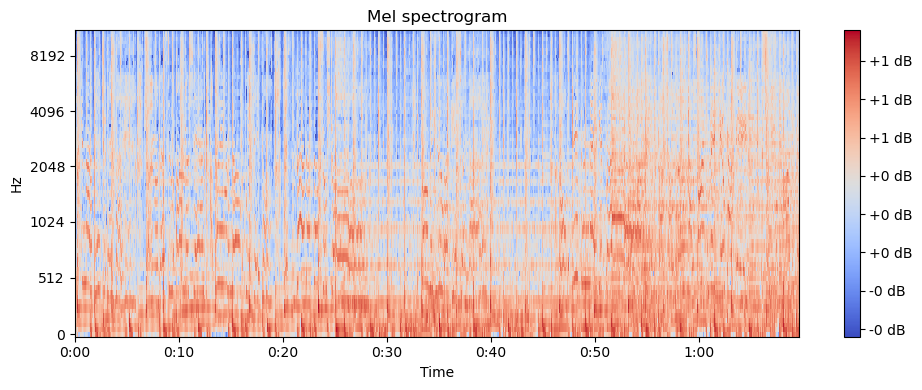

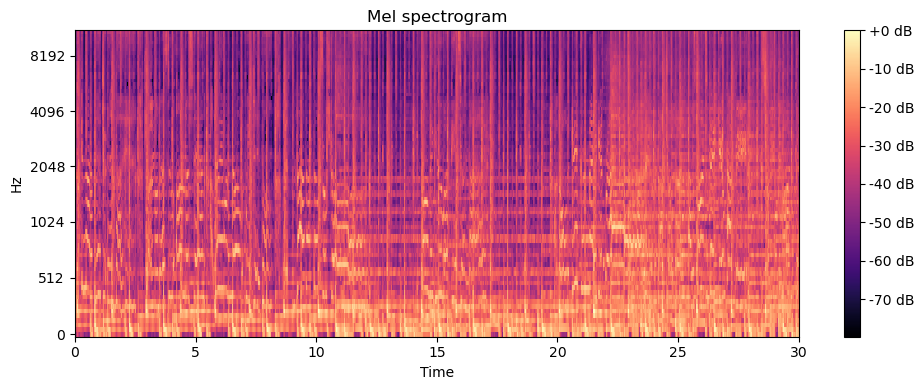

In [128]:
# generate mel spectrogram for a song using librosa and whisper to compare 

song = '/Users/uditdhand/Documents/Fall/Advanced ML/Data/genres_original/pop/pop.00027.wav'

audio = whisper.load_audio(song)
mel = whisper.log_mel_spectrogram(audio)
mel

# plot mel spectrogram 'mel

import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(10, 4))
librosa.display.specshow(mel.cpu().numpy(), sr=22050, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()

audio_librosa, sr = librosa.load(song, sr=22050)  # Ensure to unpack both audio data and sample rate
librosa_mel = librosa.feature.melspectrogram(y=audio_librosa, sr=22050, n_mels=80, n_fft=2048, hop_length=512)
librosa_mel_db = librosa.power_to_db(librosa_mel, ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa_mel_db, sr=sr, x_axis='time', y_axis='mel')  # Use the decibel scale Mel spectrogram
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()


4/4 [==============================] - 1s 189ms/step
Accuracy: 0.68
Precision: 0.70
Recall: 0.68
F1 Score: 0.67


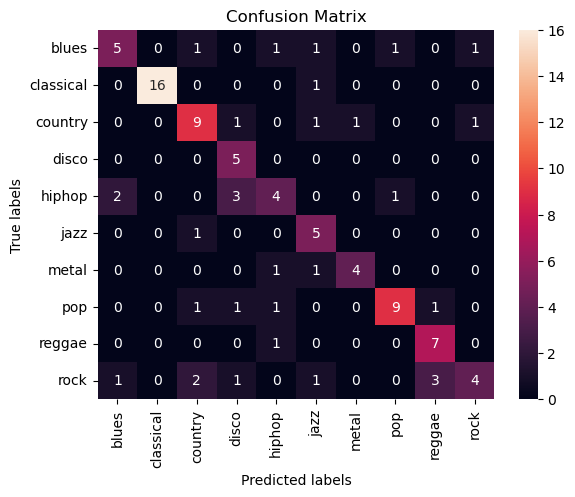

In [89]:
# check test accuracy
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)
# add labels to confusion matrix
import seaborn as sns

labels = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
ax.xaxis.set_ticklabels(labels, rotation=90); ax.yaxis.set_ticklabels(labels, rotation=0);

# accuracy, precision, recall, f1 score for test

from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='weighted')


from sklearn.metrics import precision_score, recall_score, f1_score

def display_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy: {:.2f}".format(acc))
    
    print("Precision: {:.2f}".format(precision))
    print("Recall: {:.2f}".format(recall))
    print("F1 Score: {:.2f}".format(f1))



display_metrics(y_test, y_pred)




/Users/uditdhand/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/uditdhand/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/uditdhand/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/uditdhand/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

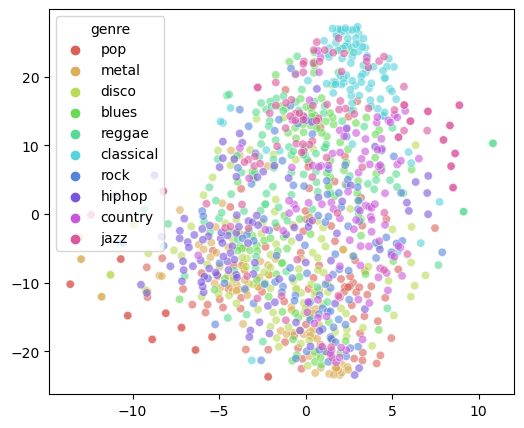

In [122]:
# tsne cluster songs based on mel spectrogram

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# convert mel spectrogram to 2D array
X = np.vstack([mel.flatten() for mel in df['mel2']])

# tsne
tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=30)
X_2d = tsne.fit_transform(X)

# plot
plt.figure(figsize=(6, 5))
sns.scatterplot(
    x=X_2d[:, 0], y=X_2d[:, 1],
    hue=df['genre'],
    palette=sns.color_palette("hls", 10),
    legend="full",
    alpha=0.6
)
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(X)

 


In [103]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, LSTM, Dense, GlobalAveragePooling1D,
    Conv1D, Dropout, Multiply, Lambda
)
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras import backend as K
# bidirectional LSTM with attention
from tensorflow.keras.layers import Bidirectional

# Assuming X_train shape is (samples, time_steps, features)
input_shape = (766,80)   # (time_steps, features)

tr_loss = []
val_loss = []
tr_acc = []
val_acc = []


# Define the input layer
input_layer = Input(shape=input_shape)

# LSTM Layers
lstm_layer = Bidirectional(LSTM(128, return_sequences=True))(input_layer)
lstm_layer = Bidirectional(LSTM(64, return_sequences=True))(lstm_layer)


# Convolutional Layer
conv_layer = Conv1D(32, kernel_size=5, activation='relu', padding='same')(lstm_layer)

# Dense Layers
dense_layer = Dense(64, activation='relu')(conv_layer)
dropout_layer = Dropout(0.2)(dense_layer)
dense_layer = Dense(32, activation='relu')(dropout_layer)
dropout_layer = Dropout(0.2)(dense_layer)
global_avg_pool = GlobalAveragePooling1D()(dense_layer)

# Output Layer
output_layer = Dense(10, activation='softmax')(global_avg_pool)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Optimizer
optimizer = Adam(learning_rate=0.002, beta_1=0.99, beta_2=0.999)

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
mod = model.fit(X_train, y_train_encoded, validation_split=0.1, epochs=500, batch_size=10)

tr_loss.append(mod.history['loss'])
val_loss.append(mod.history['val_loss'])
tr_acc.append(mod.history['accuracy'])
val_acc.append(mod.history['val_accuracy'])



Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 766, 80)]         0         
                                                                 
 bidirectional_23 (Bidirect  (None, 766, 256)          214016    
 ional)                                                          
                                                                 
 bidirectional_24 (Bidirect  (None, 766, 128)          164352    
 ional)                                                          
                                                                 
 conv1d_11 (Conv1D)          (None, 766, 32)           20512     
                                                                 
 dense_47 (Dense)            (None, 766, 64)           2112      
                                                                 
 dropout_18 (Dropout)        (None, 766, 64)           0  

KeyboardInterrupt: 

4/4 [==============================] - 2s 211ms/step
Accuracy: 0.69
Precision: 0.68
Recall: 0.69
F1 Score: 0.68


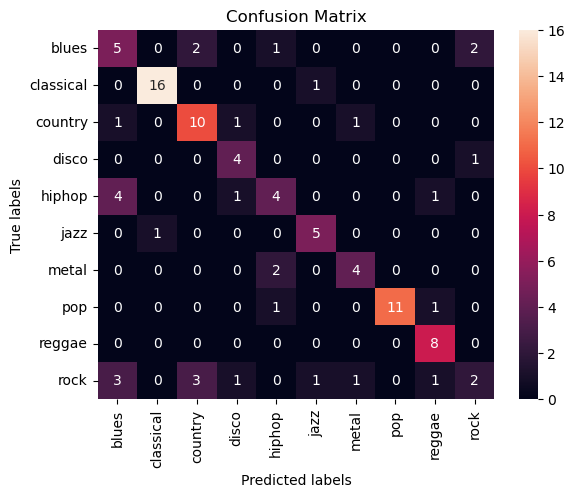

In [105]:
X_test = np.array(X_test)
y_test_encoded = np.array(y_test_encoded)

# check test accuracy
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)
# add labels to confusion matrix
import seaborn as sns

labels = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
ax.xaxis.set_ticklabels(labels, rotation=90); ax.yaxis.set_ticklabels(labels, rotation=0);

# accuracy, precision, recall, f1 score for test

from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='weighted')


from sklearn.metrics import precision_score, recall_score, f1_score

def display_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy: {:.2f}".format(acc))
    
    print("Precision: {:.2f}".format(precision))
    print("Recall: {:.2f}".format(recall))
    print("F1 Score: {:.2f}".format(f1))



display_metrics(y_test, y_pred)


